## Voorbeelden slechte data representatie
### Voorbeeld 1 (cirkeldiagram)
Een eerste slecht voorbeeld van data representatie, is volgende “cirkeldiagram”. <br>
Het is goed dat er geprobeerd werd een creatieve diagram te maken, maar de integriteit van de data is niet meer in tact gehouden.<br> Het doel van de diagram, is om de centralisatie van het bitcoin kapitaal aan te tonen.<br> De manier waarop de delen van de cirkel opgesplitst zijn is te hectisch.<br> Hierdoor is het onduidelijk wat er precies aan de hand is, aangezien het oppervlakte van elk deel moeilijk te vergelijken is met de anderen.<br> Daarnaast was een cirkeldiagram mogelijk zelfs niet de beste keuze voor deze data te representeren.<br> Een liggende staafdiagram, bijvoorbeeld, zou het makkelijker maken om op het eerste oog duidelijk de impact te zien van de centralisatie van het bitcoin kapitaal.
<br>
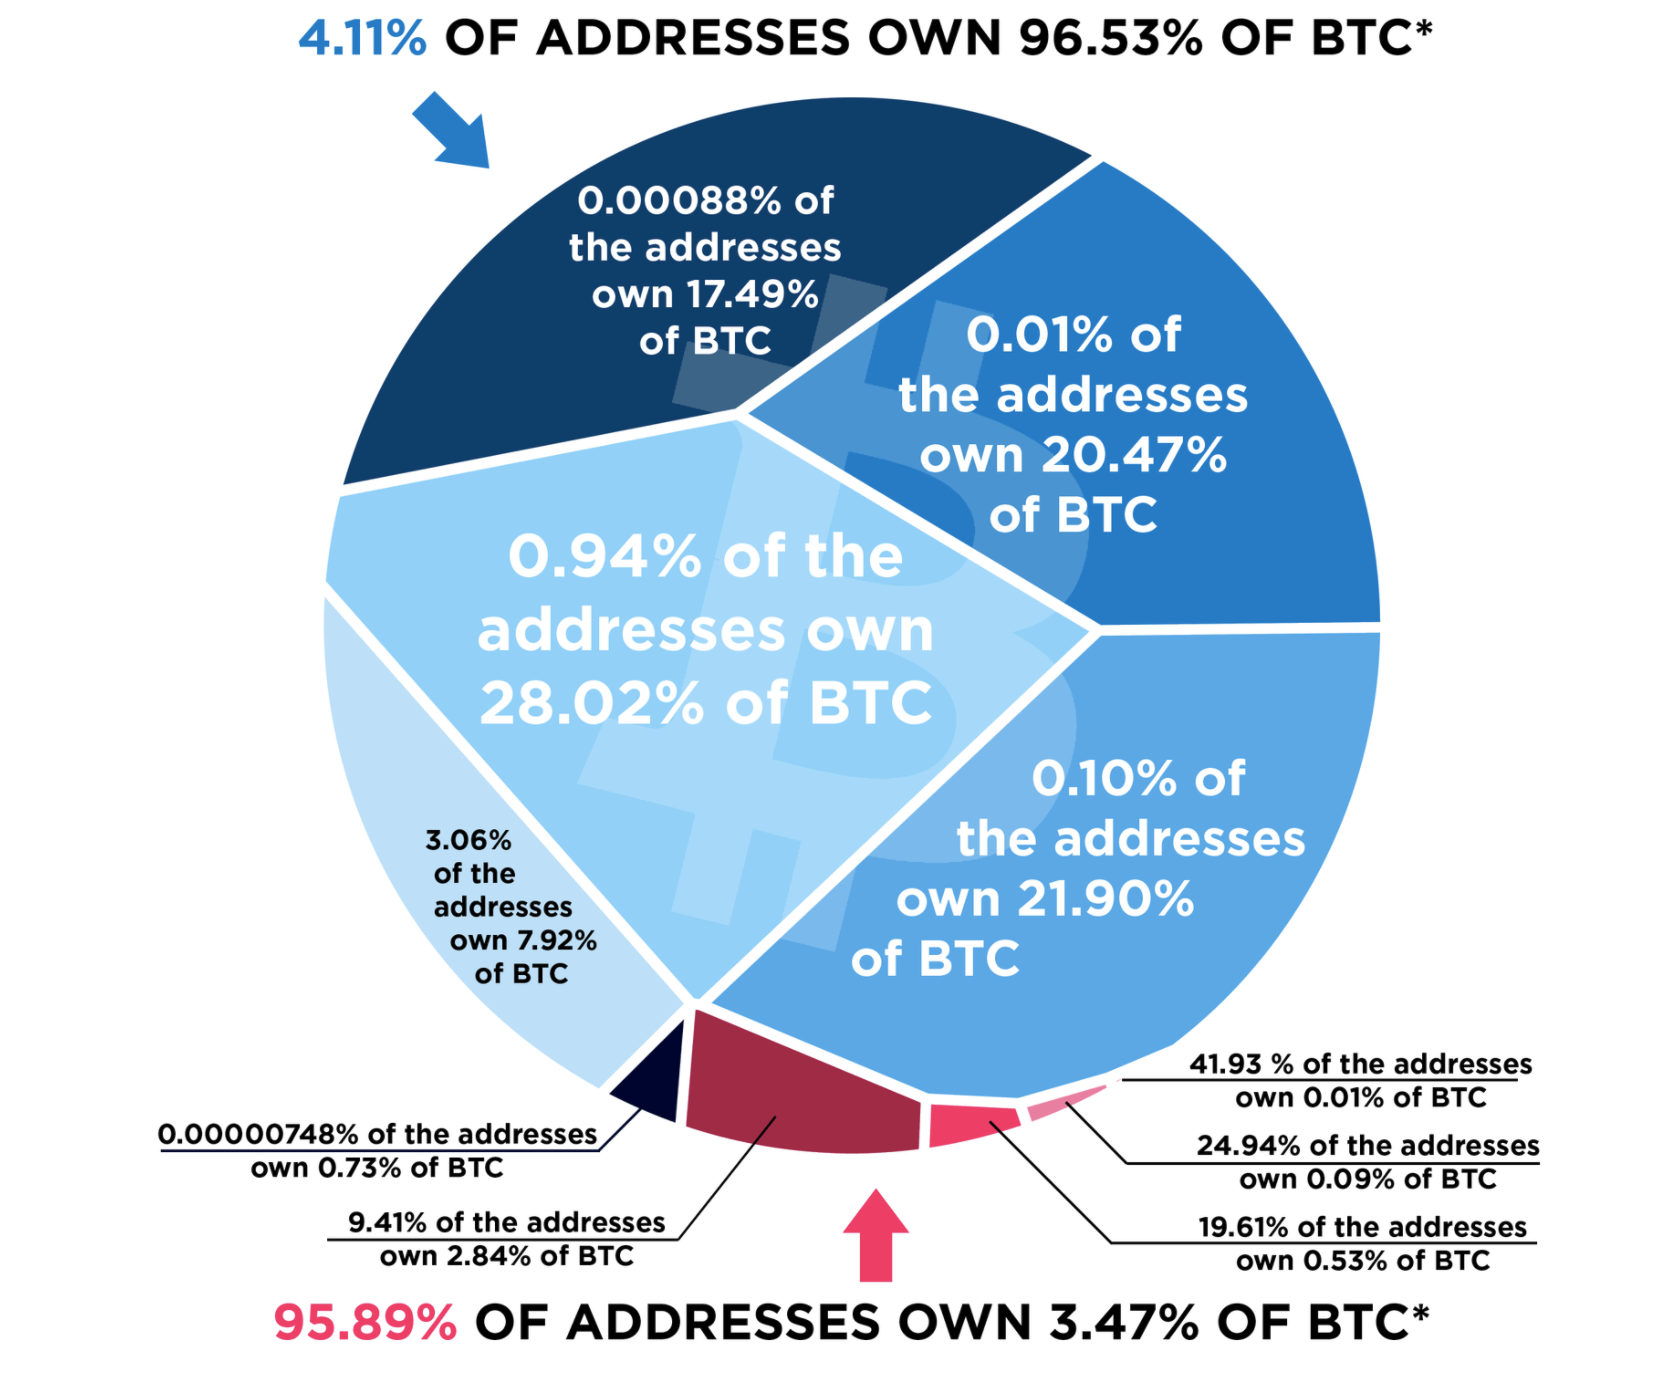

### Voorbeeld 2 (flowchart)
Een tweede slecht voorbeeld, is deze flowchart. Het valt al snel op wat hier het probleem is.<br>
Deze chart werd gebruikt in een hoorzitting in de “United States House Committee on the Judiciary”.<br>
Het is niet zo makkelijk om te zien, maar als je goed kijkt, lijkt het alsof de cirkel van Obama verbonden is met een andere cirkel van Obama. Dit brengt ons tot de eerste grote fout aan deze flowchart: de lijnen zijn bijna onmogelijk om te volgen. Het is namelijk zeer moeilijk om te identificeren waar lijnen naartoe gaan als ze elkaar kruisen.<br>
<br>
Daarnaast is het ook niet duidelijk waarom Uranium One en Russia er zo speciaal uit zien. Er trekken zelfs meer lijnen naar/uit andere (blijkend) minder significante stukken.<br>
<br>
Op het eerste zicht kan je dus bijna niks halen uit deze flowchart.
<br>
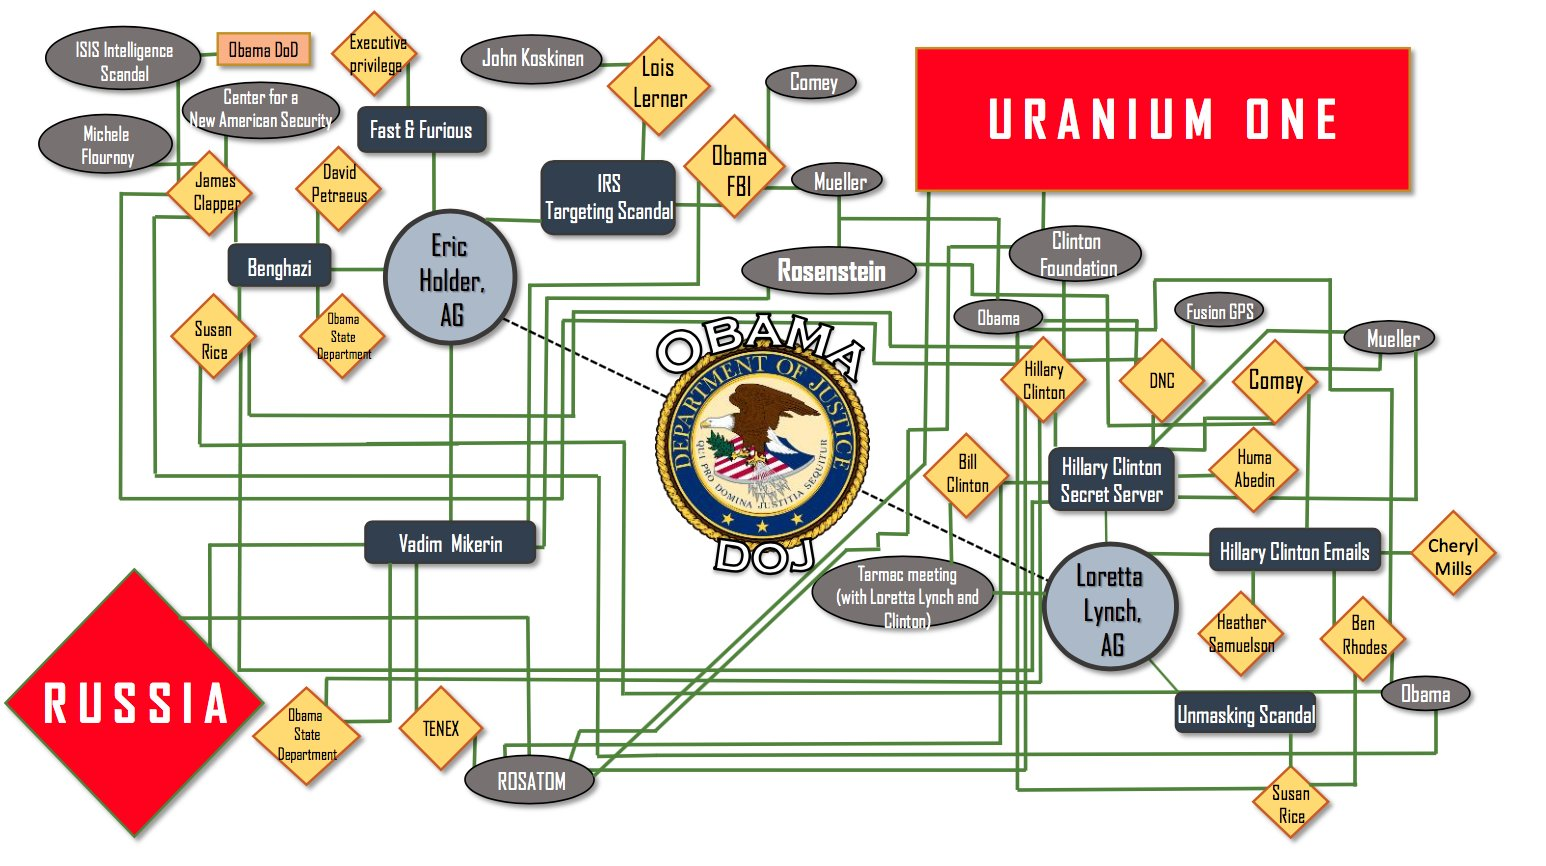
##### Gebruikte pluralsight courses

Introduction to Data Visualization with Python<br>
by YK Sugi<br>
https://app.pluralsight.com/library/courses/data-visualization-with-python-introduction/table-of-contents<br>
Gebruikt voor informatie over Jupyter, Pandas en matplotlib, waarmee tal van grafieken gemaakt kunnen worden.<br>
Een duidelijke cursus die de nodige uitleg geeft.<br>
<br>
Importing Data from Microsoft Excel Files with Python<br>
by Gabriel Cánepa<br>
https://app.pluralsight.com/guides/importing-data-from-excel-with-python<br>
Gebruikt voor informatie over openpyxl en hoe hiermee data gelezen kan worden uit Excel files, alsook hoe data of grafieken weggeschreven kunnen worden naar een Excel file.<br>
Een korte cursus, met overzichtelijke code voorbeelden.<br>

In [1]:
import openpyxl
import matplotlib
from Voetbal.Graphs import visual as visual
from Voetbal.Spelertjes import Spelertjes

Import openpxl om data in te lezen en data weg te schrijven naar xlsx file.<br>
Import methodes uit andere python files om later te gebruiken.

In [2]:
spelertjes = Spelertjes()
graphs = visual()

Maak objecten aan met de geïmporteerde objecten.

In [3]:
fileName = 'voetbal.xlsx'
sheetName = 'gegevens'
saveFileName = 'correct.xlsx'

spelertjes.readFile(fileName, sheetName)
spelertjes.writeFile(fileName, sheetName, saveFileName)

fileName = saveFileName
sheetName = "grafiek"

Lees de excel file "voetbal.xlsx" in en ga naar tab 'gegevens'. Maak deze file inorde (dubbele kolom verwijderen) en vul de data. Save daarna de file met de naam 'correct.xlsx'.<br>
De filename gaat daarna op de saveFileName gezet worden (zodat we het correcte bestand gebruiken met de juiste data op de juiste plaats). We veranderen ook de sheetname voordat we de methodes uitvoeren.<br>
De grafieken zijn nu ook tezien in de excel file (in een iets minder goede vorm).

In [4]:
def writeFile(self, fileName, sheetName, saveFileName):
    wb = load_workbook(fileName)
    ws = wb[sheetName]

    font = Font(name='Calibri',size=12,bold=True)
    header = ["naam", "positie", "aantal gemaakte goalen", "geboortecategorie", "inzet", "gewicht", "lengte","geboortedatum"]

    # fill the headers with the right values
    for i in range(len(header)):
        cellref = ws.cell(1,i+1)
        cellref.value = header[i]
        cellref.font = font
        # clear last column
        cellref = ws.cell(1,i+2)
        cellref.value = None
        
        # fill data on tab 'gegevens' with new generated values
        for i in range(len(self.spelertjesValues)):
            for j in range(len(self.spelertjesValues[i])):
                cellref = ws.cell(row=i+2, column=j+1)
                cellref.value = self.spelertjesValues[i][j]
                # clear last column
                cellref = ws.cell(row=i + 2, column=j + 2)
                cellref.value = None

        wb.save(saveFileName)

    # other code used to fill spelertjes (commented so it doesn't do anything)
    # for row in ws.rows:
        #     args = [cell.value for cell in row]
        #     birthDate = self.generateBirth()
        #     spelertje = Spelertje(args[0], args[2], args[3], self.returnCat(birthDate),self.effort[self.returnCat(birthDate)], args[6],args[7], birthDate)
        #     self.spelertjesValues.append(spelertje.returnArray())
        #     self.addSpeler(spelertje)

#### TODO hoe gegeneerd 
#### Teken de scatter chart. 


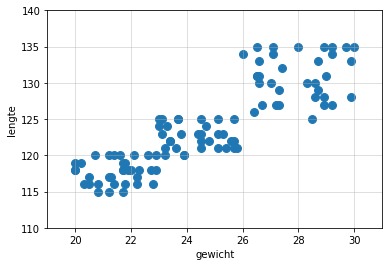

In [5]:
graphs.drawScatterChart(fileName, sheetName, fileName)

#### Teken de staafdiagram.

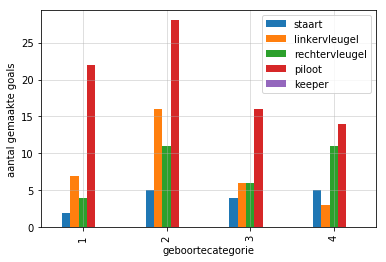

In [6]:
graphs.drawBarChart(fileName,sheetName,fileName)

#### Bespreking staafdiagram
Per geboortecategorie, wordt er nog een opdeling gemaakt volgens positie (staart, linkervleugel, ...).<br>
Aan de hand van de beschikbare data, wordt vervolgens voor elke positie in elke geboortecategorie het aantal goals getekend met een staaf. Via de y-as is dan een schatting van het aantal goals zienbaar.<br>
Uit deze gegevens blijkt dat piloten bijna altijd de meeste goals scoren, op een gedeelde tweede plaats de linker- en rechtervleugel, op de derde plaats de staart en tot slot als laatste de keeper, die in deze dataset geen goals gescoord heeft.<br>
#### Bereken gemiddelde en modus

In [7]:
graphs.averageAndModus(fileName)

Modus: 
---------------

staart :0
linkervleugel :1
rechtervleugel :1
piloot :4
keeper :0

Average Goals: 
---------------

staart : 0.8
linkervleugel : 1.6
rechtervleugel : 1.6
piloot : 4.0
keeper : 0.0


#### Bereken kwartiel 1 en de standaardafwijking van kolom G (het gewicht)

In [8]:
graphs.calculateQuartileAndStd(fileName)

Kwartiel 1 : 22.075000000000003
standaard afwijking : 2.8691211197856394


#### Lijkt er een verband te zijn  tussen positie op het veld en het aantal goals scoren?
Blijkend uit de staafdiagram, is er wel degelijk een verband tussen de positie op het veld en het aantal goals dat gescoord wordt. Zo is het op eerste zicht duidelijk dat een speler met positie 'piloot' bijna altijd het meeste goals scoort, terwijl een speler met positie 'keeper' bijna nooit een goal scoort (of zelfs helemaal niet in deze dataset).
#### Teken de cirkeldiagram.

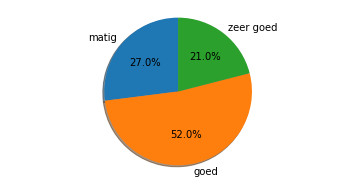

In [9]:
graphs.drawPieChart(fileName)

#### Bespreking cirkeldiagram
Uit de cirkeldiagram is het snel duidelijk dat het merendeel van de spelers een 'goede' inzet hebben, 48% om precies te zijn. Bijna 1 op 5 van de spelers heeft als inzet 'zeer goed' en het resterende 1/3 van de spelers heeft een 'matige' inzet.

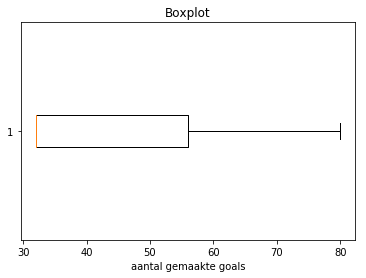

In [10]:
graphs.drawBoxPlot(fileName)

#### TODO bespreek<br>
#### Welk soort gegeven (van de 4 besproken in de cursus) is 'aantal gemaakte goalen', 'inzet' en 'gewicht'
'aantal gemaakte goalen' is een kwantitatief gegeven, meer specifiek een discreet gegeven.
'inzet' is een kwalitatief gegeven, meer specifiek een ordinaal gegeven.
'gewicht' is een kwantitatief gegeven, meer specifiek een continu gegeven.